# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [3]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = merged_data.loc[merged_data["Mouse ID"] == 'g989', :]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data["Mouse ID"].isin(dup_mouse_id)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_clean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median_clean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var_clean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_clean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem_clean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_table = pd.DataFrame({"Mean Tumor Volume":mean_clean,
                             "Median Tumor Volume":median_clean,
                             "Tumor Volume Variance":var_clean,
                             "Tumor Volume Std. Dev.":std_clean,
                             "Tumor VOlume Std. Err.":sem_clean})
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor VOlume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_clean_table = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
agg_clean_table.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [10]:
mouse_count = clean_df["Drug Regimen"].value_counts()
mouse_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

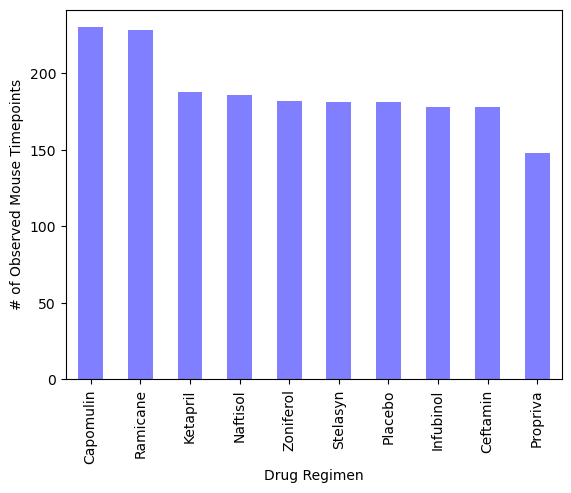

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = mouse_count.plot.bar(color='blue', alpha=0.5, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

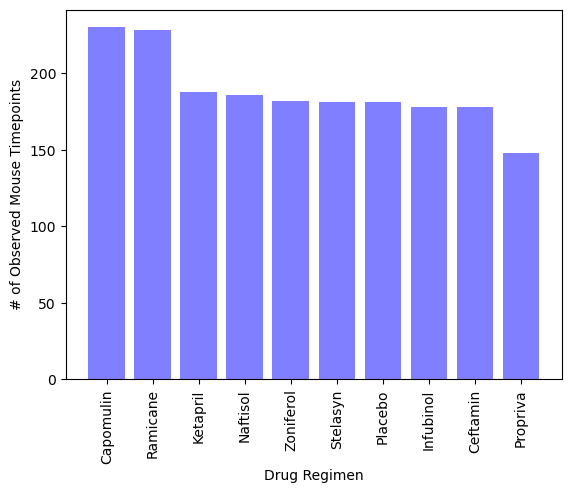

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = mouse_count.index
y = mouse_count.values

plt.bar(x, y, color='blue', alpha=0.5, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

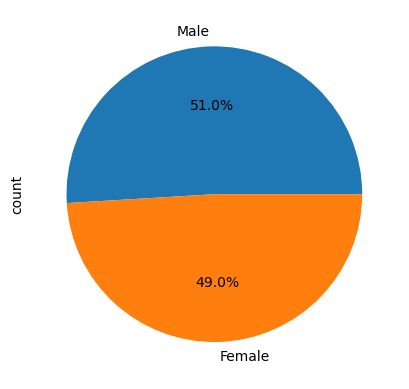

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()

pandas_pie = gender.plot.pie(autopct="%1.1f%%")

plt.show()

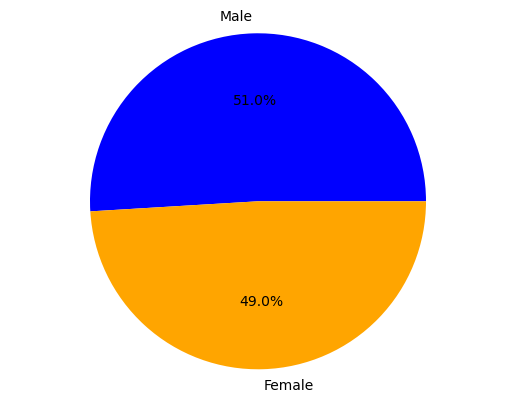

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = gender
colors = ["blue", "orange"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
226,j246,Capomulin,Female,21,21,0,45.0,0
227,r554,Capomulin,Female,8,17,0,45.0,0
228,s185,Capomulin,Female,3,17,0,45.0,0
229,b742,Capomulin,Male,7,21,0,45.0,0


In [16]:
# Start by getting the last (greatest) timepoint for each mouse
great_timepoint_df = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_tumor_volume = pd.merge(great_timepoint_df, clean_df, on=("Mouse ID","Timepoint"), how="left")
merge_tumor_volume.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# Loop through treatments
for x in treatments:
    drug = merge_tumor_volume.loc[merge_tumor_volume["Drug Regimen"] == x]
    tumor_vol_data.append(drug["Tumor Volume (mm3)"])

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = merge_tumor_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = round(lowerq - (1.5*iqr), 4)
    upper_bound = round(upperq - (1.5*iqr), 4)
    
    # Determine outliers using upper and lower bounds
    outliers = drug.loc[(drug["Tumor Volume (mm3)"] < lower_bound) | (drug["Tumor Volume (mm3)"] > upper_bound)]
    outlier_values = outliers["Tumor Volume (mm3)"]
    
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"The median of {x} is: {quartiles[0.5]} ")
    print(f"{x}'s potential outliers are: {outlier_values}")
    print(f"------------------------------------------")


The lower quartile of Capomulin is: 45.8758668475
The upper quartile of Capomulin is: 65.05362410500001
The interquartile range of Capomulin is: 19.177757257500012
The median of Capomulin is: 55.793278175 
Capomulin's potential outliers are: 19     38.982878
24     38.939633
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
162    46.539206
169    41.581521
180    40.728578
204    40.658124
208    39.952347
Name: Tumor Volume (mm3), dtype: float64
------------------------------------------
The lower quartile of Ramicane is: 45.8758668475
The upper quartile of Ramicane is: 65.05362410500001
The interquartile range of Ramicane is: 19.177757257500012
The median of Ramicane is: 55.793278175 
Ramicane's potential outliers are: 6      38.407618
7      43.047543
10     38.810366
33     38.342008
45     37.311236
52     40.659006
77     36.374510
157    45.220869
158    36.561652
166    37.225650
168    43.41

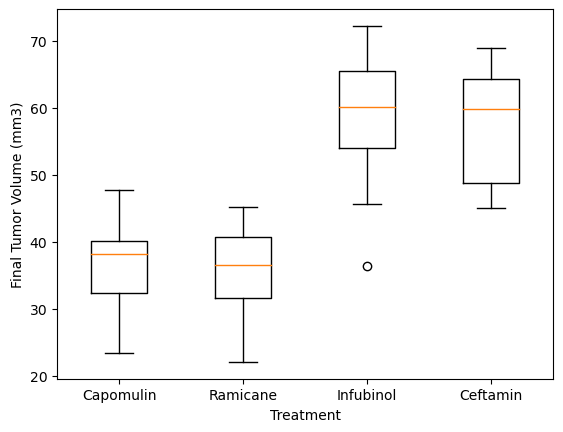

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.boxplot(tumor_vol_data)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Treatment')
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

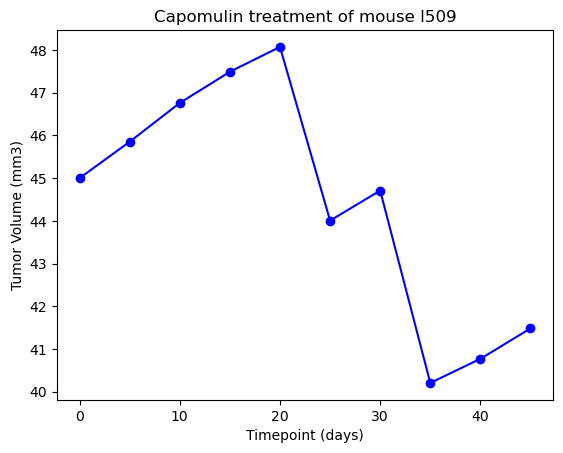

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df["Mouse ID"] == "l509"]
timepoint_x = capomulin_mouse["Timepoint"]
tumor_vol_y = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(timepoint_x,tumor_vol_y, marker="o", color="blue")
plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

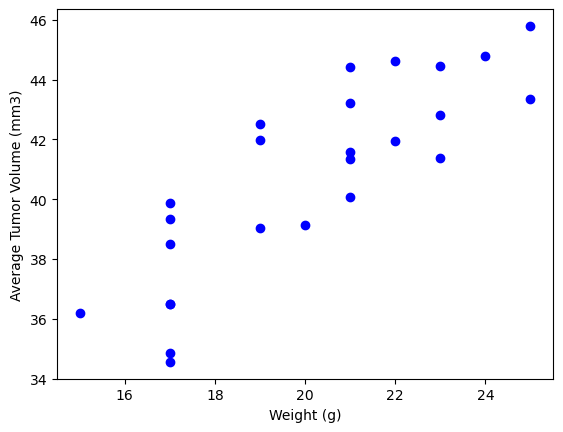

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_data = capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

mouse_weight = avg_data["Weight (g)"]
average_tumor_vol = avg_data["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, average_tumor_vol, color="blue")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)
The r-squared is: 0.7088568047708723


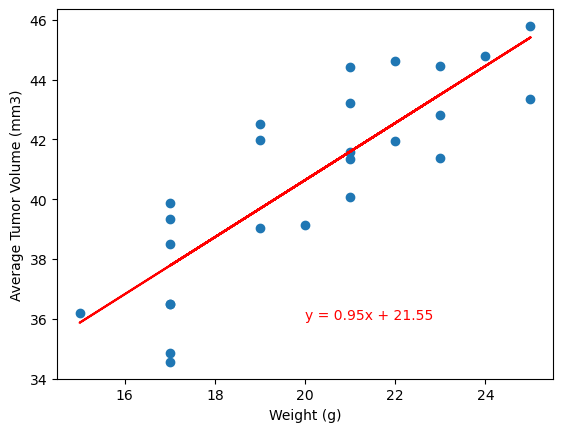

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

x_values = mouse_weight
y_values = average_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(20,36),color="red")
plt.show()